#### Notebook 3.2.3 - Denoising autoencoders

TODO: theory

First, let us import the required packages. We will use:
* Matplotlib for plotting.
* TensorFlow for building the models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os; os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf

from tensorflow import keras

Now, let's load the dataset. We'll use the `load_data()` function from the `keras.dataset.mnist` package to load the MNIST dataset. This function will return two tuples of NumPy arrays in the form:

$$
(X_{train}, y_{train}), (X_{test}, y_{test})
$$

As we will not use labels, both $y_{train}$ and $y_{test}$ will not be expressed in our code (and, hence, modified using an underscore).

Afterward, we will create the `preprocess()` function, which accepts the design matrix as single parameter, and converts it in the range between $0$ and $1$.

In [2]:
(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()

def preprocess(design_matrix):
    return design_matrix.astype('float32') / 255

X_train = preprocess(X_train)
X_test = preprocess(X_test)

Let's create the models for our denoising autoencoder. We will use two 

In [3]:
class DenoisingAutoencoder(keras.Model):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Flatten(),
            keras.layers.Dense(32, activation='relu')])
        self.decoder = keras.Sequential([
            keras.layers.Dense(784, activation='sigmoid'),
            keras.layers.Reshape((28, 28))])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


class ConvDenoisingAutoencoder(keras.Model):
    def __init__(self):
        super(ConvDenoisingAutoencoder, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.InputLayer(input_shape=(28, 28, 1)),
            keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')])
        self.decoder = keras.Sequential([
            keras.layers.Conv2DTranspose(8, (2, 2), activation='relu', padding='same'),
            keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = DenoisingAutoencoder()
conv_autoencoder = ConvDenoisingAutoencoder()

In [4]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

C:\Users\acard\AppData\Local\Temp\ipykernel_32884\4219005159.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 5, i + 1)


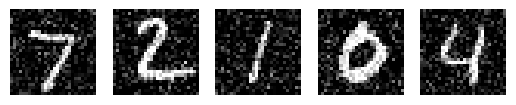

In [5]:
plt.subplots()

for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
autoencoder.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError())

autoencoder.fit(x_train_noisy,
                x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0322 - val_loss: 0.0169
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0149 - val_loss: 0.0134
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0135 - val_loss: 0.0129
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0131 - val_loss: 0.0127
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0129 - val_loss: 0.0125
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0127 - val_loss: 0.0123
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0126 - val_loss: 0.0123
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0125 - val_loss: 0.0122
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.012

In [36]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

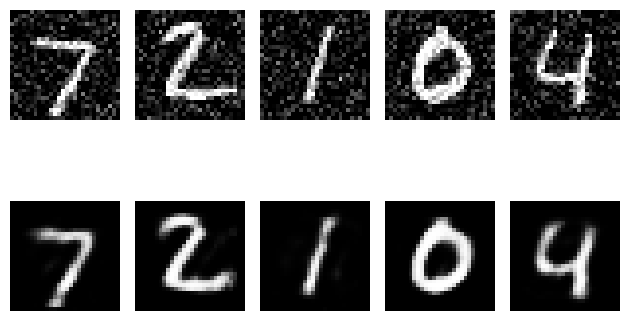

In [39]:
plt.figure()

for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.axis('off')
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [48]:
conv_autoencoder.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.MeanSquaredError())

conv_autoencoder.fit(x_train_noisy,
                x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

encoded_imgs = conv_autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = conv_autoencoder.decoder(encoded_imgs).numpy()

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0098 - val_loss: 0.0031
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 10/10
1875/1875 [==============================] - 21s 11m

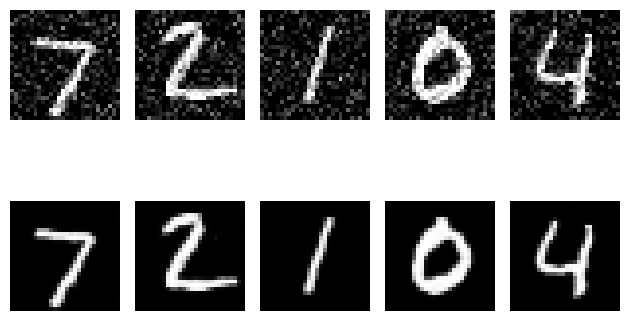

In [49]:
plt.figure()

for i in range(5):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_noisy[i], cmap='gray')
    plt.axis('off')
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_imgs[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()